Un notebook propre et commenté (introduction,
analyses, conclusion, etc) contenant : le procédé de
développement de votre outil, du prétraitement à la
modélisation des données, en passant par l’analyse
exploratoire.

Pensez à répondre à la problématique.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('data\\raw\\marketing_campaign.csv' , sep='\t', index_col = 0)
pd.set_option('display.max_columns', None)

# df.info()

In [3]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

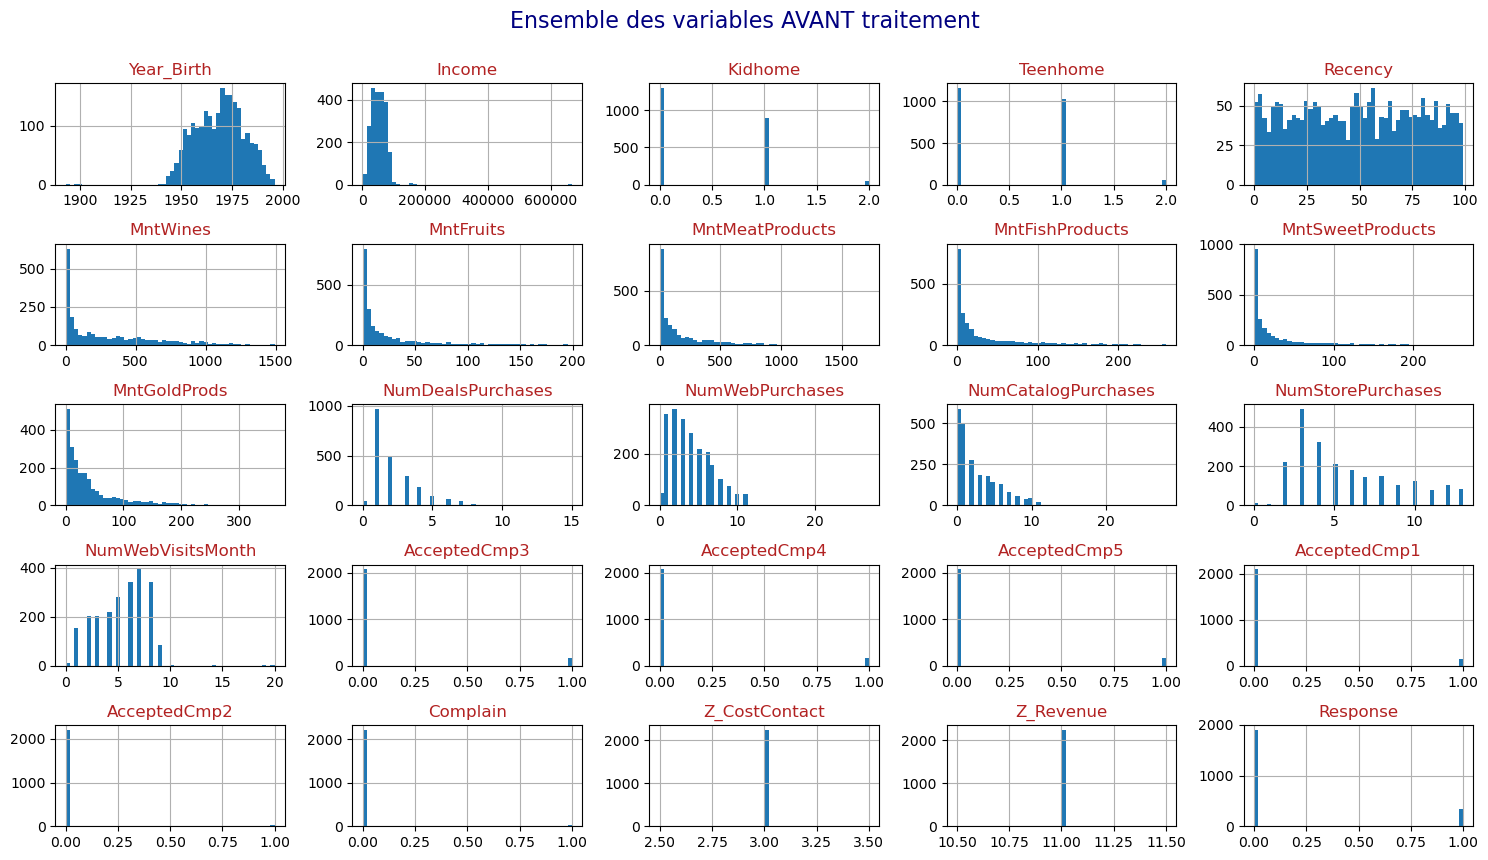

In [4]:
axes = df.hist(bins=50, figsize=(15,9))
plt.suptitle("Ensemble des variables AVANT traitement", fontsize=16, color="navy")
# Modifier la couleur des titres individuels
for ax in axes.ravel():  # ravel() aplatit la grille d'axes
    ax.set_title(ax.get_title(), color='firebrick')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

In [5]:
# df.head()

In [6]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
# df.describe(include=['object', 'category', 'bool', 'datetime'])

## Nettoyage

In [ ]:
# Cette observation est-elle une abération ? ? ? ? 
df.loc[7829]

Year_Birth                   1900
Education                2n Cycle
Marital_Status           Divorced
Income                    36640.0
Kidhome                         1
Teenhome                        0
Dt_Customer            26-09-2013
Recency                        99
MntWines                       15
MntFruits                       6
MntMeatProducts                 8
MntFishProducts                 7
MntSweetProducts                4
MntGoldProds                   25
NumDealsPurchases               1
NumWebPurchases                 2
NumCatalogPurchases             1
NumStorePurchases               2
NumWebVisitsMonth               5
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        1
Z_CostContact                   3
Z_Revenue                      11
Response                        0
Name: 7829, dtype: object

In [8]:
# Recherche des null, il y en a dans Income
# df.isnull().sum()

In [9]:
# supprime toutes les lignes du DataFrame df où la colonne Income contient une valeur manquante
df = df.dropna(subset=['Income'])

In [10]:
# certaines données sont erronées pour les années de naissance , au lieu d'etre a 1900 c'est a 1800 
df[df['Year_Birth'] < 1900]['Year_Birth']

ID
11004    1893
1150     1899
Name: Year_Birth, dtype: int64

In [11]:
df.loc[[11004, 1150]]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


In [12]:
df.loc[11004, 'Year_Birth'] = 1993
df.loc[1150, 'Year_Birth'] = 1999

In [13]:
#passage de la colonne Dt_Customer en datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y", errors='coerce')
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format="%Y")


In [14]:
# df['Dt_Customer'].dtype

In [15]:
# df['Year_Birth'].dtype

In [16]:
# # toutes les dt_customers sont situés entre 2012 et 2015
# df[(df['Dt_Customer'] > '01-01-2015') | (df['Dt_Customer'] < '01-01-2012')]

In [17]:
# axes = df.hist(bins=50, figsize=(15,9))
# plt.suptitle("Valeurs de l'ensemble des variables", fontsize=16, color="navy")
# # Modifier la couleur des titres individuels
# for ax in axes.ravel():  # ravel() aplatit la grille d'axes
#     ax.set_title(ax.get_title(), color='firebrick')

# plt.tight_layout(rect=[0, 0.03, 1, 0.98])
# plt.show()

In [29]:
df.loc[df['Age']==125]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Seniority
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
7829,2n Cycle,Divorced,36640.0,1,0,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,125,12


In [19]:
df['Age'] = datetime.today().year - df['Year_Birth'].dt.year
df['Customer_Seniority'] = datetime.today().year - df['Dt_Customer'].dt.year

In [20]:
df.drop(['Z_Revenue','Z_CostContact', 'Year_Birth', 'Dt_Customer'], axis=1, inplace= True)

## Standardisation

In [ ]:
to_std = ['Income',
        'Customer_Seniority', 
        'MntWines', 
        'MntFruits', 
        'MntMeatProducts', 
        'MntFishProducts', 
        'MntSweetProducts', 
        'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth' ]


- moyenne ≈ 0
- écart-type ≈ 1.

In [ ]:

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[to_std] = scaler.fit_transform(df[to_std])

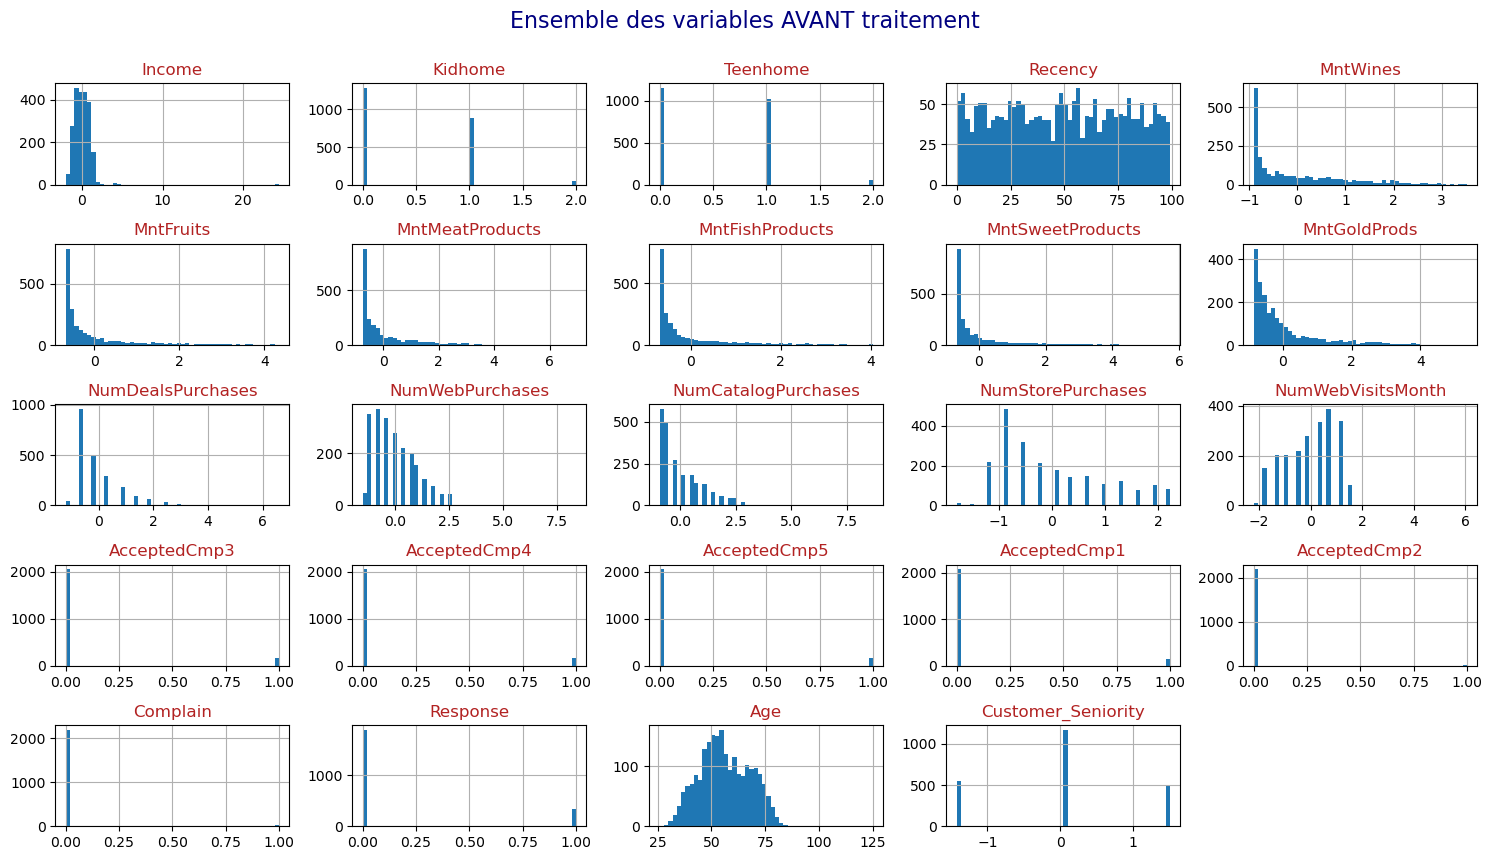

In [24]:
axes = df_scaled.hist(bins=50, figsize=(15,9))
plt.suptitle("Ensemble des variables AVANT traitement", fontsize=16, color="navy")
# Modifier la couleur des titres individuels
for ax in axes.ravel():  # ravel() aplatit la grille d'axes
    ax.set_title(ax.get_title(), color='firebrick')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

In [23]:
# # Séparation des valeurs numériques et des strings
# df_num = df.select_dtypes(include=['int64', 'float64'])
# df_str = df.select_dtypes(include=['object'])

# # Standardiser et PCA sur numériques car on ne peux pas le faire sur des Chaines de caractères
# scaler = StandardScaler()
# df_num_scaled = scaler.fit_transform(df_num)

# pca = PCA(n_components=5)
# df_pca = pca.fit_transform(df_num_scaled)

# # Transformer en dataframe avec noms de colonnes
# df_num_pca_and_scaled = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

# # Recomposer dataframe final
# marketing_campaign_clean = pd.concat([df_num_pca_and_scaled, df_str.reset_index(drop=True)], axis=1)
# marketing_campaign_clean.to_csv('data\\processed\\marketing_campaign_clean.csv', index=False, sep=',')